In [1]:
# importing necessary libraries

import numpy as np
import wbgapi as wb
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as opt
from scipy.stats import norm
%matplotlib inline
# creating a country codes list and indicator id list
# EN.ATM.CO2E.PC = CO2 emissions (metric tons per capita)

country_codes = ["GBR","USA","BGD"]
indicator_id = ["EN.ATM.CO2E.PC"]
# creating dataframe for clustering

df = wb.data.DataFrame(indicator_id,country_codes,skipAggs=True, mrv=10, columns='series', numericTimeKeys=True)
df.index.names = ['country','year']
df["co2"] = pd.to_numeric(df["EN.ATM.CO2E.PC"])
df = df.drop(['EN.ATM.CO2E.PC'], axis =1)
df

co2
country year           
BGD     2009   0.306665
        2010   0.342740
        2011   0.364567
        2012   0.384025
        2013   0.396566
        2014   0.412899
        2015   0.458798
        2016   0.466776
        2017   0.492907
        2018   0.512837
GBR     2009   7.468655
        2010   7.675926
        2011   7.025425
        2012   7.332471
        2013   7.064903
        2014   6.421598
        2015   6.148545
        2016   5.774742
        2017   5.546266
        2018   5.398708
USA     2009  16.818868
        2010  17.434196
        2011  16.599404
        2012  15.771145
        2013  16.102958
        2014  16.026379
        2015  15.535342
        2016  15.131747
        2017  14.805882
        2018  15.240875

In [2]:
# resetting index to convert Multiindexed dataframe

df = df.reset_index(level=[1])
df

,year,co2
country,,
BGD,2009,0.306665
BGD,2010,0.342740
BGD,2011,0.364567
BGD,2012,0.384025
BGD,2013,0.396566
BGD,2014,0.412899
BGD,2015,0.458798
BGD,2016,0.466776
BGD,2017,0.492907


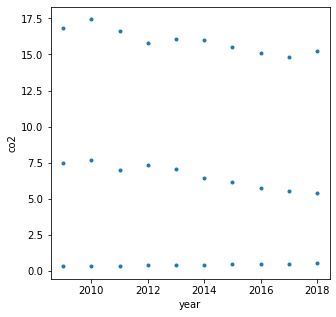

In [3]:
# plotting function
def makeplot(df, col1, col2):
    """
    Produces a square plot of two columns of dataframe df using small circle 
    symbols.
    """
    
    plt.figure(figsize=(5.0,5.0))
    plt.plot(df[col1], df[col2], "o", markersize=3)
    
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
# plotting the datapoints of the dataframe
makeplot(df, "year", "co2")

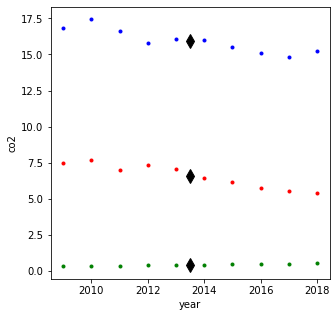

In [4]:
import sklearn.cluster as cluster

####### kmeans set up the clusterer, 4 expected clusters
kmeans = cluster.KMeans(n_clusters=3)

# extract columns for fitting
df_fit = df[["year", "co2"]].copy()
kmeans.fit(df_fit)     

# extract labels and cluster centres
labels = kmeans.labels_
cen = kmeans.cluster_centers_

# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))

col = ["blue", "red", "green"]
for l in range(3):     # loop over the different labels
    plt.plot(df_fit["year"][labels==l], df_fit["co2"][labels==l], "o", markersize=3, color=col[l])
    
# show cluster centres
for ic in range(3):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
    
plt.xlabel("year")
plt.ylabel("co2")
plt.show()